In [1]:
"""Minimal end-to-end example for PyCausalImpact."""

import pathlib
import sys
import os
from functools import partial

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


sys.path.insert(0, str(pathlib.Path(os.getcwd()).resolve().parents[1]))

from pycausalimpact import CausalImpactPy
from pycausalimpact.models.statsmodels import StatsmodelsAdapter

              observed   predicted  predicted_lower  predicted_upper  \
average      20.945549    5.653114         0.268340        11.037889   
cumulative  628.366483  169.593429         8.050189       331.136668   

            abs_effect  abs_effect_lower  abs_effect_upper  rel_effect  \
average      15.292435          9.907660         20.677210    2.705135   
cumulative  458.773054        297.229815        620.316294    2.705135   

            rel_effect_lower  rel_effect_upper       p_value  \
average             0.897605         77.056114  2.603851e-08   
cumulative          0.897605         77.056114  2.603851e-08   

            causal_probability  
average                    1.0  
cumulative                 1.0  


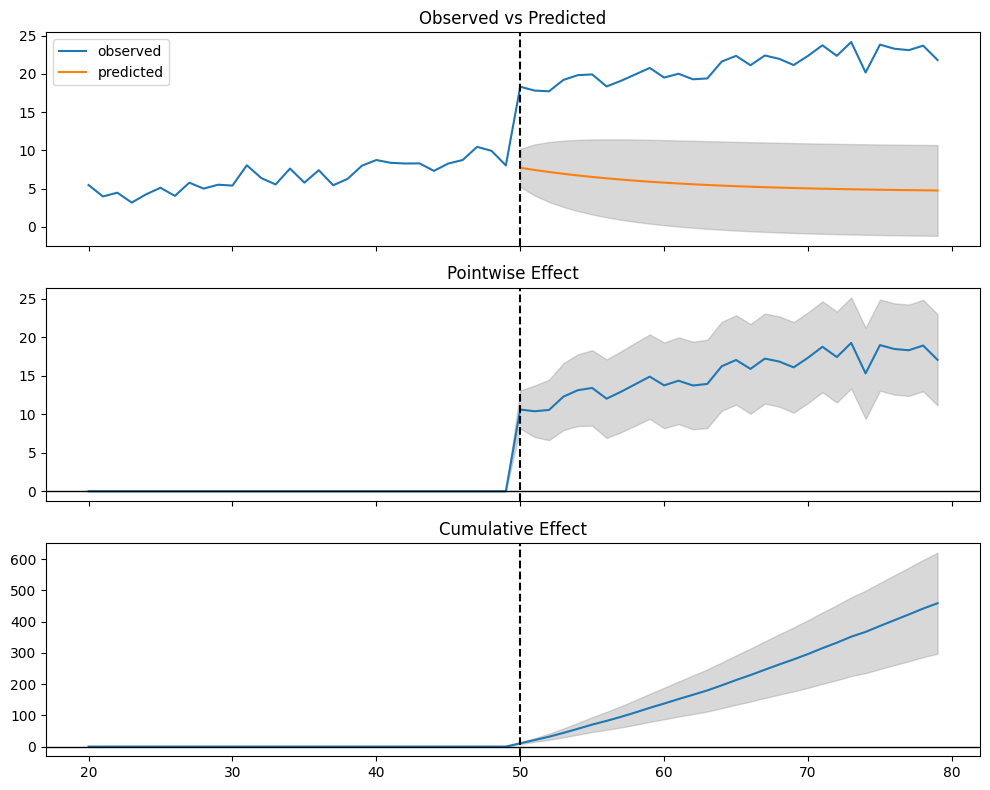

In [2]:
# -------------------------
# 1. Generate synthetic data
# -------------------------
np.random.seed(42)
n = 80
intervention_point = 50

# Base trend: upward drift + random noise
time = np.arange(n)
trend = 0.2 * time  # upward trend
noise = np.random.normal(0, 1, n)  # Gaussian noise

# Intervention: add a positive level shift post-period
series = trend + noise
series[intervention_point:] += 8  # clear upward jump after intervention

df = pd.DataFrame({"y": series})

# -------------------------
# 2. Define pre/post periods
# -------------------------
pre_period = (0, intervention_point - 1)  # pre-intervention
post_period = (intervention_point, n - 1)  # post-intervention

# -------------------------
# 3. Define and run model
# -------------------------
model = StatsmodelsAdapter(partial(ARIMA, order=(1, 0, 0)))
impact = CausalImpactPy(
    data=df,
    index=None,
    y=["y"],
    pre_period=pre_period,
    post_period=post_period,
    model=model,
)

impact.run()
print(impact.summary(plot=True))


              observed   predicted  predicted_lower  predicted_upper  \
average      12.946549   11.047209       -11.388048        33.482465   
cumulative  388.396483  331.416264      -341.641436      1004.473964   

            abs_effect  abs_effect_lower  abs_effect_upper  rel_effect  \
average       1.899341        -20.535916         24.334597    0.171929   
cumulative   56.980219       -616.077481        730.037919    0.171929   

            rel_effect_lower  rel_effect_upper   p_value  causal_probability  
average            -0.613333         -2.136854  0.868214            0.565893  
cumulative         -0.613333         -2.136854  0.868214            0.565893  


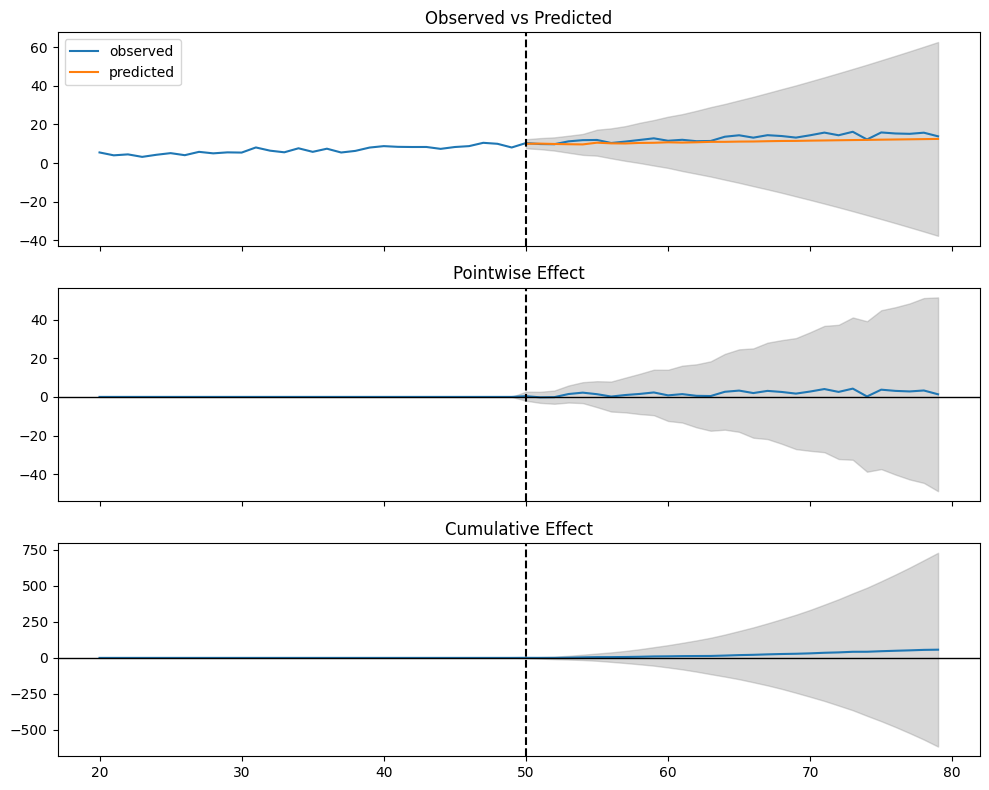